# Colun or semicolun ?

In this notebook, you are going to implement a logistic regression algrorithm.
- 1st, you'll build a dataset
- 2nd, you'll you are going do define a model
- 3rd, a backpropagation method
- 4th, a gradient descent method


---
### Dataset

We build a dataset to illustrate our purpose.

The dataset we build is supposed to help us converting a paper scan into a ASCII string. Lets imagine that, when a paper is scaned, we can detect, with high confidence that we are over a colun or a semicolun. Our objective here is to detect wether it's one or the other.

Therefore, our algorithm is fed with a vector $x_i \in [0,1]^5$ which represent the intensity of the pen stroke writting on the paper.

Here below, you have an example of 'perfect' strokes for $x_1$ an example of colun, and $x_2$ an example of semicolun. 

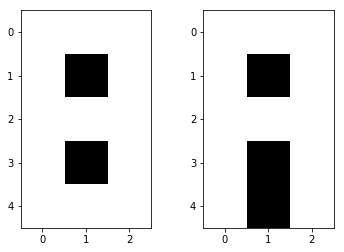

In [24]:
import matplotlib.pyplot as plt
import numpy as np

x_1 = np.array([0,1,0,1,0])
x_2 = np.array([0,1,0,1,1])

def to_img(vec):
    matrix = np.ones((5, 3))
    matrix[:, 1] = 1-vec
    return matrix

fig, axs = plt.subplots(1,2)
axs[0].imshow(to_img(x_1), cmap='gray')
axs[1].imshow(to_img(x_2), cmap='gray')
plt.show()

Whenever a sample $x_i$ belongs to the class *colun*, we'll label it with $y_i=0$.  
Likewise, whenever a sample $x_i$ belongs to the class *semicolun*, we'll label it with $y_i=1$.  

In [5]:
y_1 = 0
y_2 = 1

### Dataset generation

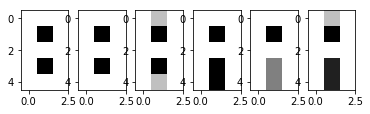

In [26]:
X = np.array([
    [.0, 1., 0., 1., 0.],
    [.0, .9, 0., .9, 0.],
    [.2, .8, 0., .8, .2],
    [.0, 1., 0., 1., 1.],
    [.0, 1., 0., .5, .5],
    [.2, .8, 0., .7, .7]])
y = np.array([0,0,0,1,1,1])


fig, axs = plt.subplots(1,6)
for i in range(len(X)):
    axs[i].imshow(to_img(X[i]), cmap='gray')
plt.show()

---
### Define a logistic regression model

(You may want to read this : http://cs229.stanford.edu/notes/cs229-notes1.pdf).

You're going to build a model which outputs a prediction value $p_i$ given an input $x_i$. This prediction $p_i$ will reflect the propability that your input $x_i$ belongs to class 1.
$$
\begin{align}
p_i &= P(Y=1 | W, x_i) \\
p(x_i,W) &= P(Y=1 | W, x_i)
\end{align}
$$

As $p_i$ is a probability, it must be in [0,1].

The model we'll consider perform a weighted sum of its input:
- Weighted sum : $ s = (W^t \cdot X + b) $

And then squizes the values between 0 and 1 (which is our prediction value):
- prediction : $ p(s) = \frac{1}{1 + e^{-s}} $

In [16]:
b=1
W = np.random.random((1,5))
s=np.dot(W,X.transpose())+b

def sigmoid(s):
    return 1/(1+np.exp(-s))
              
p=sigmoid(s)
print (p)


[[ 0.8994728   0.88817587  0.8897987   0.94439319  0.90087515  0.91278709]]


---
### Compare these predicted values ($p_i$) with the true output ($y_i$)

Overall, we would like to maximize the likelihood that we are right at predicting a label.  

$$
\begin{align}
\max \text{likelihood} &= \text{argmax}_w \Pi_i P(Y | W, x_i) \\
&= \text{argmax}_w \Pi_i \big( P(Y=y_i | W, x_i) \big) \\
&= \text{argmax}_w \Pi_i \big( P(Y=1 | W, x_i)^{y_i} \cdot P(Y=0 | W, x_i)^{1-y_i} \big) \\
&= \text{argmax}_w \Pi_i \big( P(Y=1 | W, x_i)^{y_i} \cdot 1-P(Y=1 | W, x_i)^{1-y_i}\big) \\
&= \text{argmax}_w \Pi_i \big( p_i^{y_i} \cdot 1-p_i^{1-y_i}\big) \\
&= \text{argmax}_w \sum_i \big( y_i \ln(p_i) + (1-y_i) \ln(1-p_i) \big) \\
&= \text{argmin}_w - \sum_i \big( y_i \ln(p_i) + (1-y_i) \ln(1-p_i) \big) \\
\end{align}
$$
And this term is going to be our **loss** that we want to reduce:
$$
L(x_i, W, y_i) = - \sum_i \big( y_i \ln(p_i) + (1-y_i) \ln(1-p_i) \big)
$$
This is how you compare the prediction you made ($p_i$) to the true output you expected ($y_i$).

#### In our example :
In means of colun and semicolun : remember $x_0$, it's a colun, therefore it's label is $y_0=0$.  
If your classifier is good you'ld expect it to predict it's a semicolun, hense have $p_i = $*"Something small like 0.1"*. 

The error for this one sample is going to be:
$$
\begin{align}
L(X, W, y) &= - \sum_i \big( y_i \ln(p_i) + (1-y_i) \ln(1-p_i) \big) \\
&= y_0 \ln(p_0) + (1-y_0) \ln(1-p_0) \\
&= - 0 \ln(.9) + (1-0) \ln(1-.9) \\
&= - \ln(.1)
\end{align}
$$

### Find the minimum of the Loss function

To reduce the error, we have to find the minimum of $L(x, W, y)$.  
Hense, we derive it with respect to $W$ and find the 'zeros'.

In [17]:
def ln(x) :
    return np.log(x)

def deriveLoss(y,W,X) :
    s=np.dot(W,X.transpose())+b
    p=sigmoid(s)
    P_Y=np.zeros([1,6])  
    for i in range(0,len(y)):
        P_Y[0,i]=p[0,i]-y[i,]
        derive=np.dot(P_Y,X)/len(X)
    return derive
print (deriveLoss(y,W,X))


[[ 0.02675286  0.38102801  0.          0.30740863  0.08529024]]


### Apply Stochastic gradient descent to solve this

We are going to solve this with Stochastic Gradient Descent (SGD), meaning that we start with some values for $W$ and update this values such that our loss value disminushes.
$$
W = W + \alpha \frac{\delta L(x, W, y)}{\delta W}
$$

In [27]:
alpha=0.01
print ("y we want :" )
print (y)
for i in range (1,20000) :
    W=W-alpha*deriveLoss(y,W,X)
print("prediction")
print(sigmoid(np.dot(W,X.transpose())+b))
print("weights")
print (W)
    
        
   



y we want :
[0 0 0 1 1 1]
prediction
[[ 0.00578594  0.01064598  0.15188978  0.99947709  0.84764228  0.99128139]]
weights
[[ -1.71529812  -5.12313195   0.65280342  -1.0233901   12.7021091 ]]
